In [1]:
!pip install pandas neo4j langchain langchain-community langchain-deepseek python-dotenv matplotlib plotly

   ---------------------------------------- 0.0/312.3 kB ? eta -:--:--
   ------------------ --------------------- 143.4/312.3 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 312.3/312.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/414.3 kB ? eta -:--:--
   --------------------------------------- 414.3/414.3 kB 25.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/55.3 kB ? eta -:--:--
   ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   --------------------------------------- 472.8/472.8 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langch

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from neo4j import GraphDatabase
from dotenv import load_dotenv
from langchain_deepseek import ChatDeepSeek
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

In [190]:
DEEPSEEK_API_KEY = "sk-36affcfb593645f281d509da8ff1b994"  # Replace with your actual key or use env variables
NEO4J_URI = "neo4j+s://99a87445.databases.neo4j.io"  # Update with your Neo4j URI if different
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "8BT3HOe3OIdJjEWO08s3iOI8uvPtrtbrjB9OO3PJZfc" 

In [192]:
os.environ["DEEPSEEK_API_KEY"] = DEEPSEEK_API_KEY

In [93]:
def test_neo4j_connection():
    """Test connection to Neo4j database"""
    try:
        driver = GraphDatabase.driver(
            NEO4J_URI, 
            auth=(NEO4J_USERNAME, NEO4J_PASSWORD)
        )
        
        with driver.session() as session:
            result = session.run("RETURN 'Neo4j Connection Successful!' AS message")
            print(result.single()["message"])
        
        driver.close()
        return True
    except Exception as e:
        print(f"Failed to connect to Neo4j: {str(e)}")
        return False

In [95]:
neo4j_ok = test_neo4j_connection()

Neo4j Connection Successful!


In [45]:
def initialize_llm():
    """Initialize Deepseek LLM"""
    try:
        # Set the API key in environment variable as expected by Deepseek
        os.environ["DEEPSEEK_API_KEY"] = DEEPSEEK_API_KEY
        
        llm = ChatDeepSeek(
            model="deepseek-chat",
            api_key=DEEPSEEK_API_KEY,  # Pass API key directly
            temperature=0.1
        )
        
        # Quick test
        response = llm("Reply with 'Deepseek Connection Successful!' if you can read this.")
        print(response)
        return llm
    except Exception as e:
        print(f"Failed to initialize Deepseek LLM: {str(e)}")
        return None

In [47]:
llm_ok = initialize_llm() is not None


C:\Users\gandh\AppData\Local\Temp\ipykernel_25552\1153692049.py:14: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm("Reply with 'Deepseek Connection Successful!' if you can read this.")
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=865514dd-8542-4dd8-b4b2-e90a98f558e8,id=865514dd-8542-4dd8-b4b2-e90a98f558e8
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=865514dd-8542-4dd8-b4b2-e90a98f558e8,id=865514dd-85

content='Deepseek Connection Successful!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 17, 'total_tokens': 22, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 17}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_3a5770e1b4_prod0225', 'finish_reason': 'stop', 'logprobs': None} id='run-865514dd-8542-4dd8-b4b2-e90a98f558e8-0' usage_metadata={'input_tokens': 17, 'output_tokens': 5, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}


In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
def load_data(data_path="C:\\demos\\GraphRAG\\output"):
    """Load all CSV files for the demo"""
    print("Loading data files...")
    
    # List of CSV files to load
    files = [
        "customers.csv",
        "transactions.csv", 
        "interactions.csv",
        "campaigns.csv",
        "customer_reviews_complete.csv",
        "support_tickets.csv"
    ]
    
    # Dictionary to store DataFrames
    dfs = {}
    
    # Load each file
    for file in files:
        try:
            filepath = os.path.join(data_path, file)
            df_name = file.replace('.csv', '')
            dfs[df_name] = pd.read_csv(filepath)
            print(f"✅ Loaded {file}: {len(dfs[df_name])} rows")
        except Exception as e:
            print(f"❌ Error loading {file}: {e}")
    
    return dfs

# Load the data from your specific folder
data = load_data("C:\\demos\\GraphRAG\\output")

Loading data files...
✅ Loaded customers.csv: 5000 rows
✅ Loaded transactions.csv: 32295 rows
✅ Loaded interactions.csv: 100000 rows
✅ Loaded campaigns.csv: 200 rows
✅ Loaded customer_reviews_complete.csv: 1000 rows
✅ Loaded support_tickets.csv: 3000 rows


In [69]:
print("\n== Dataset Overview ==")
for name, df in data.items():
    print(f"\n{name.upper()}: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"Columns: {', '.join(df.columns)}")


== Dataset Overview ==

CUSTOMERS: 5000 rows, 12 columns
Columns: customer_id, full_name, age, gender, email, phone, street_address, city, state, zip_code, registration_date, preferred_channel

TRANSACTIONS: 32295 rows, 10 columns
Columns: transaction_id, customer_id, product_name, product_category, quantity, price, transaction_date, store_location, payment_method, discount_applied

INTERACTIONS: 100000 rows, 8 columns
Columns: interaction_id, customer_id, channel, interaction_type, interaction_date, duration, page_or_product, session_id

CAMPAIGNS: 200 rows, 12 columns
Columns: campaign_id, campaign_name, campaign_type, start_date, end_date, target_segment, budget, impressions, clicks, conversions, conversion_rate, roi

CUSTOMER_REVIEWS_COMPLETE: 1000 rows, 10 columns
Columns: review_id, customer_id, product_name, product_category, full_name, transaction_date, review_date, rating, review_title, review_text

SUPPORT_TICKETS: 3000 rows, 10 columns
Columns: ticket_id, customer_id, issue


== Customer Data Sample ==


,customer_id,full_name,age,gender,email,phone,street_address,city,state,zip_code,registration_date,preferred_channel
0,4c30e132-0704-4459-a509-9eddde934977,Mark Johnson,40.0,Male,mark.johnson@yahoo.com,989.608.3863,819 Johnson Course,Houston,Texas,29158.0,2024-04-25,NaN
1,68bec407-275f-4b5b-9a82-13d02f54626a,Robert Smith,33.0,Male,smithr@yahoo.com,(518)349-5931x0341,35116 Michael Key Suite 078,Austin,Texas,16862.0,2021-05-30,in-store
2,4466459f-76c8-433c-814e-6d59cb4131fc,Jamie Chavez,42.0,Female,jchavez@gmail.com,364.583.5030x564,419 Amanda Gardens,Detroit,Michigan,21918.0,2023-12-14,online
3,04c36a25-02f3-462c-92b0-6bf291c57706,Thomas Bradley,53.0,Male,thomas.bradley@hotmail.com,(332)887-1012x269,7242 Julie Plain Suite 969,Fort Worth,Texas,52851.0,2022-07-11,both
4,e916df3d-c3f5-40b0-8ae2-5d043be88300,Jane Ferrell,32.0,Female,jane.ferrell@hotmail.com,5484281489,845 Kelly Estate,Atlanta,Georgia,59971.0,2020-09-06,online



== Customer Demographics ==


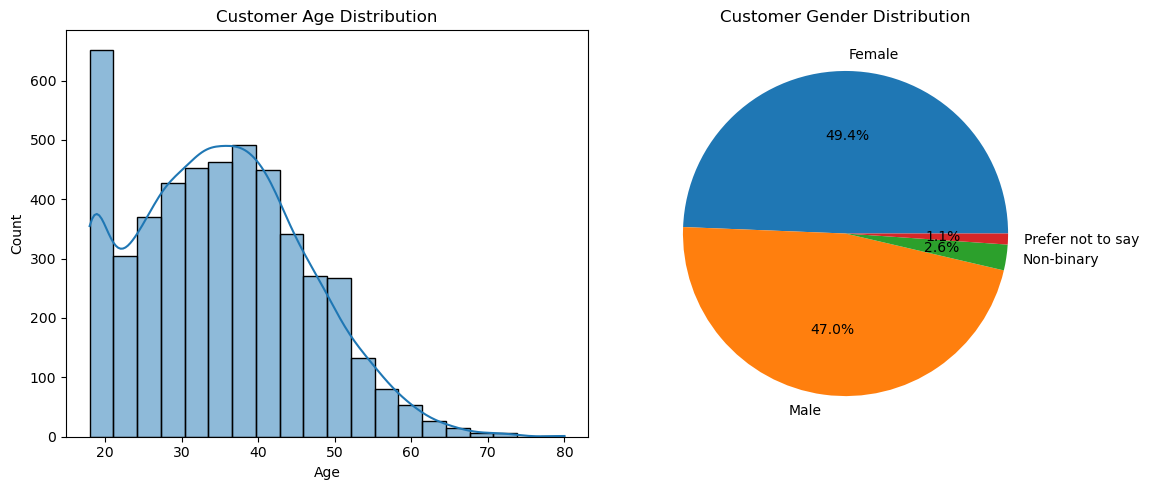

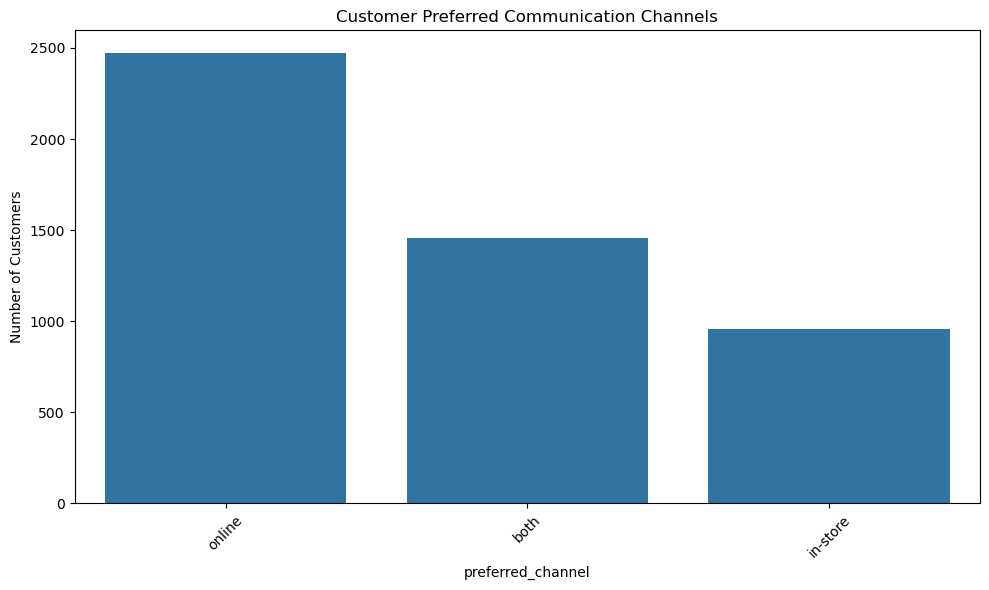

In [71]:
print("\n== Customer Data Sample ==")
if "customers" in data:
    customers = data["customers"]
    display(customers.head())
    
    # Customer demographics
    print("\n== Customer Demographics ==")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Age distribution
    sns.histplot(customers["age"], bins=20, kde=True, ax=ax1)
    ax1.set_title("Customer Age Distribution")
    ax1.set_xlabel("Age")
    
    # Gender distribution
    gender_counts = customers["gender"].value_counts()
    ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    ax2.set_title("Customer Gender Distribution")
    
    plt.tight_layout()
    plt.show()
    
    # Preferred channel distribution
    plt.figure(figsize=(10, 6))
    channel_counts = customers["preferred_channel"].value_counts()
    sns.barplot(x=channel_counts.index, y=channel_counts.values)
    plt.title("Customer Preferred Communication Channels")
    plt.xticks(rotation=45)
    plt.ylabel("Number of Customers")
    plt.tight_layout()
    plt.show()


== Transaction Data Sample ==


,transaction_id,customer_id,product_name,product_category,quantity,price,transaction_date,store_location,payment_method,discount_applied
0,53e3d9f5-6231-46de-aa39-e5f8eaae2eee,727839b2-f084-4e94-94d8-ae59cc8e4b84,Ring Doorbell,Smart Home Devices,1.0,140.07,2020-12-06,"Houston, TX",Credit Card,20.0
1,ae6e6edf-f2fe-45c8-989c-c01e77eade0c,c4ac244c-989e-46fb-b243-91dd1d5cf739,Oculus Quest,Gaming Consoles,1.0,339.57,2021-04-26,Online,Gift Card,0.0
2,ba85240a-2b5d-4987-ac0a-efb6a4a57d6d,d296bf0d-92bb-4670-a578-2fd3553cf7c8,Samsung Galaxy S22,Smartphones,2.0,1335.88,2021-10-28,Online,PayPal,30.0
3,3725a285-2a2b-4a80-b317-7c8041cd9b8b,7b1b9980-9d65-40fc-8ad6-6afaae4699e4,External Hard Drive,Computer Accessories,1.0,91.56,2023-03-16,Online,Credit Card,25.0
4,de1b05a5-68c7-4b00-a068-e8c2f13f0dab,8595dcfa-2bfc-46f4-a15a-042af85b78cd,MacBook Pro,Laptops,1.0,985.15,2022-08-30,"Atlanta, GA",Credit Card,0.0



== Transaction Trends ==


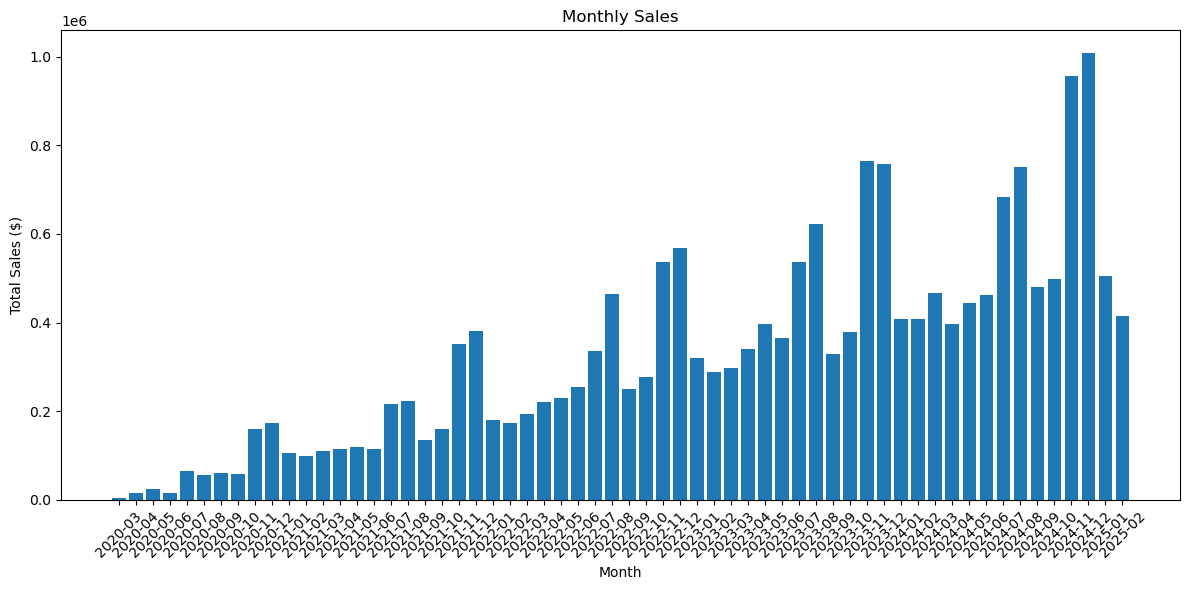

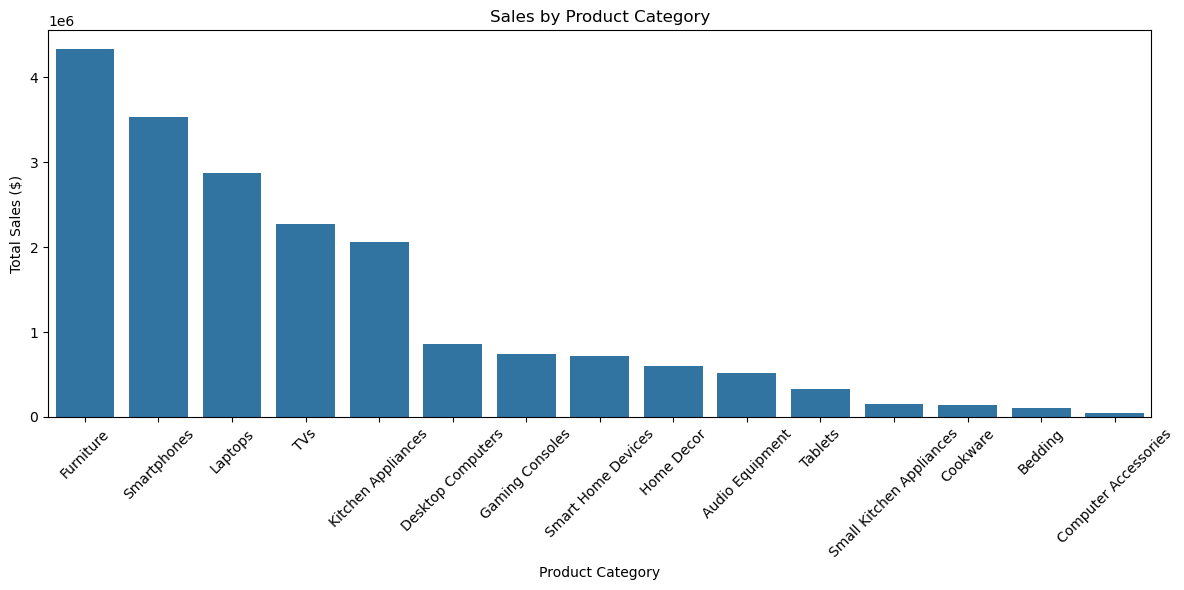

In [75]:
print("\n== Transaction Data Sample ==")
if "transactions" in data:
    transactions = data["transactions"]
    display(transactions.head())
    
    # Transaction trends
    print("\n== Transaction Trends ==")
    # Convert transaction_date to datetime
    transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])
    
    # Group by month and calculate total sales
    monthly_sales = transactions.groupby(transactions["transaction_date"].dt.to_period("M")).agg({
        "price": "sum",
        "transaction_id": "count"
    }).reset_index()
    
    monthly_sales["transaction_date"] = monthly_sales["transaction_date"].astype(str)
    
    # Plot monthly sales
    plt.figure(figsize=(12, 6))
    plt.bar(monthly_sales["transaction_date"], monthly_sales["price"])
    plt.title("Monthly Sales")
    plt.xlabel("Month")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Product category analysis
    category_sales = transactions.groupby("product_category").agg({
        "price": "sum",
        "transaction_id": "count"
    }).reset_index()
    
    category_sales = category_sales.sort_values("price", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x="product_category", y="price", data=category_sales)
    plt.title("Sales by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


== Customer Review Analysis ==


,review_id,customer_id,product_name,product_category,full_name,transaction_date,review_date,rating,review_title,review_text
0,rev_000001,e9848049-323f-4f95-a26e-3cffc219d591,Bookshelf,Furniture,Patrick Guerrero,2024-05-30,2024-06-12,5,Sturdy and Elegant Addition to My Study Room,Just received the bookshelf I've been eyeing f...
1,rev_000002,24bcc3c6-ce17-423f-87f5-a1f6d1114ba7,Oculus Quest,Gaming Consoles,Katie Burton,2024-03-10,2024-04-05,5,Immersive Virtual Reality Adventure!,"Katie Burton, a tech enthusiast from Dallas, T..."
2,rev_000003,8806399f-1c9b-47f7-b8ca-fac5468438ff,OnePlus 10,Smartphones,Fernando Rogers,2024-06-14,2024-06-29,4,"Impressive Performance, Room for Improvement i...",The OnePlus 10 has been a great addition to my...
3,rev_000004,62ab496d-f69a-48af-b44c-08ac79b6f68d,iPhone 13,Smartphones,Sara Howell,2024-03-27,2024-04-06,4,"Solid Upgrade, Could've Been Perfect!",The iPhone 13 has been a great addition to my ...
4,rev_000005,1b7daed4-aaa6-41b1-9826-0d51d67614e3,Bookshelf,Furniture,Kelly Kim,2023-08-16,2023-09-01,4,"Sturdy, Yet Lacking Personality",I recently purchased this bookshelf for my hom...


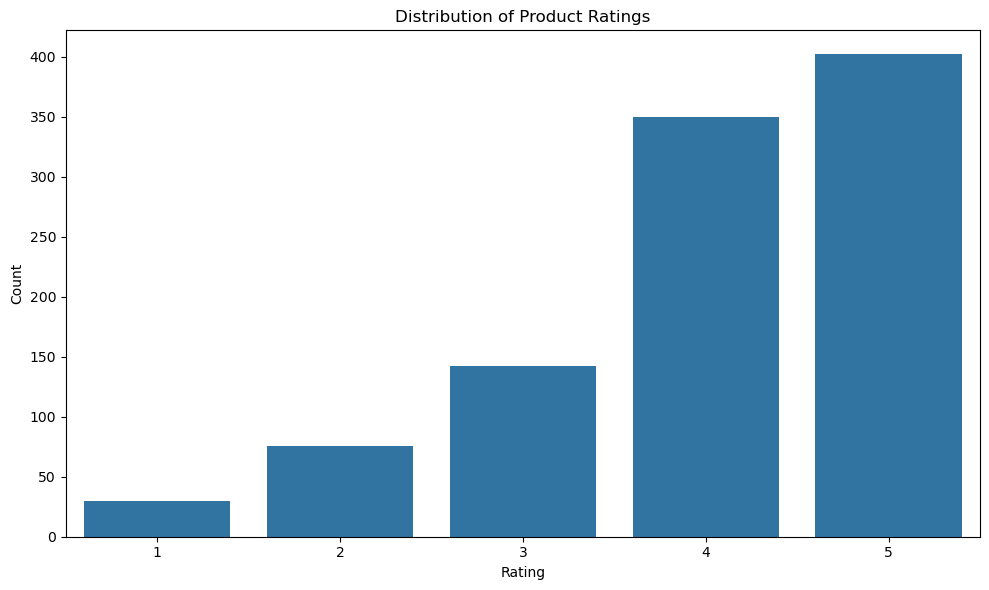

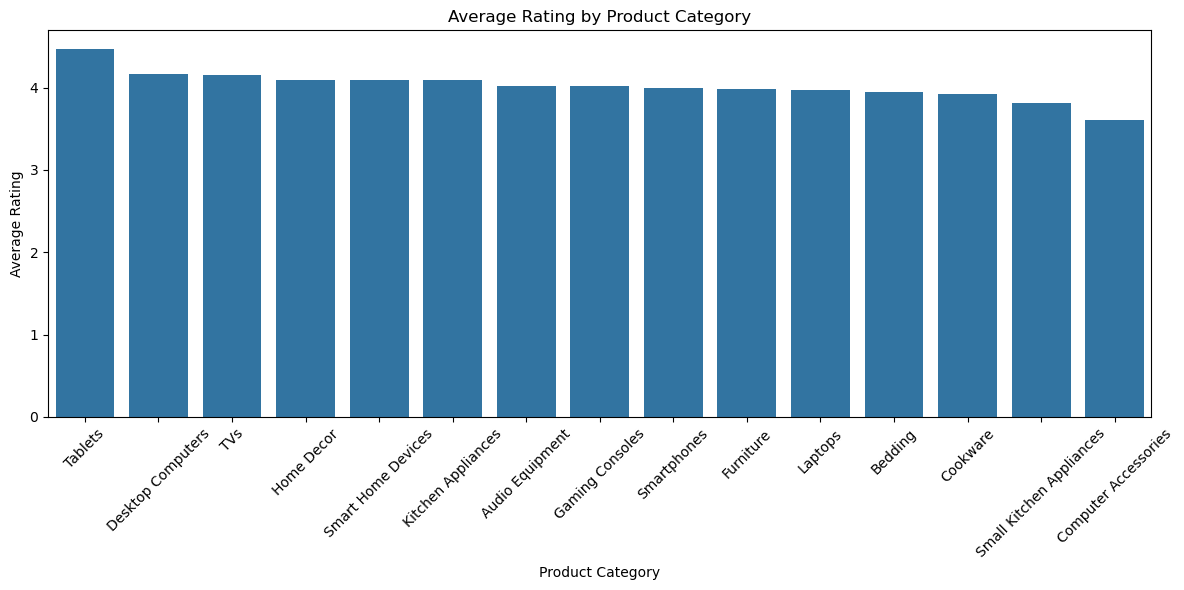

In [77]:
print("\n== Customer Review Analysis ==")
if "customer_reviews_complete" in data:
    reviews = data["customer_reviews_complete"]
    display(reviews.head())
    
    # Rating distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x="rating", data=reviews)
    plt.title("Distribution of Product Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # Average rating by product category
    avg_rating_by_category = reviews.groupby("product_category")["rating"].mean().reset_index()
    avg_rating_by_category = avg_rating_by_category.sort_values("rating", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x="product_category", y="rating", data=avg_rating_by_category)
    plt.title("Average Rating by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Average Rating")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


== Marketing Campaign Performance ==


,campaign_id,campaign_name,campaign_type,start_date,end_date,target_segment,budget,impressions,clicks,conversions,conversion_rate,roi
0,0d120125-26cc-4023-9a54-bebbc0159b76,Black Friday Sale 2022,Online Display Ads,2020-09-29,2020-11-13,Southern States,14528.90,740965.0,1189.0,53.0,4.46,-61.31
1,152bbef1-7ced-46ec-b252-fb396a78261e,Limited Time Promotion 2023,Influencer Marketing,2020-11-12,2020-11-26,Technology Enthusiasts,42749.22,2762249.0,27008.0,634.0,2.35,558.13
2,eedd0753-1436-4e7f-8f5f-4a237aa3204a,Back to School Sale 2024,Print Advertisement,2022-03-05,2022-06-03,Seniors (60+),58955.33,3845868.0,25984.0,1235.0,4.75,501.18
3,09e1626c-5b59-4fa7-b5e2-a1d1446c9fd9,Weekend Blowout 2020,Email Marketing,2022-03-12,2022-06-10,Technology Enthusiasts,9414.34,707728.0,17802.0,1357.0,7.62,2002.81
4,3de639fc-f687-440f-bccf-d3700a3d38b8,Limited Time Special 2021,Print Advertisement,2021-08-12,2021-11-10,Loyal Customers,75307.55,6930900.0,51264.0,1873.0,3.65,1037.30


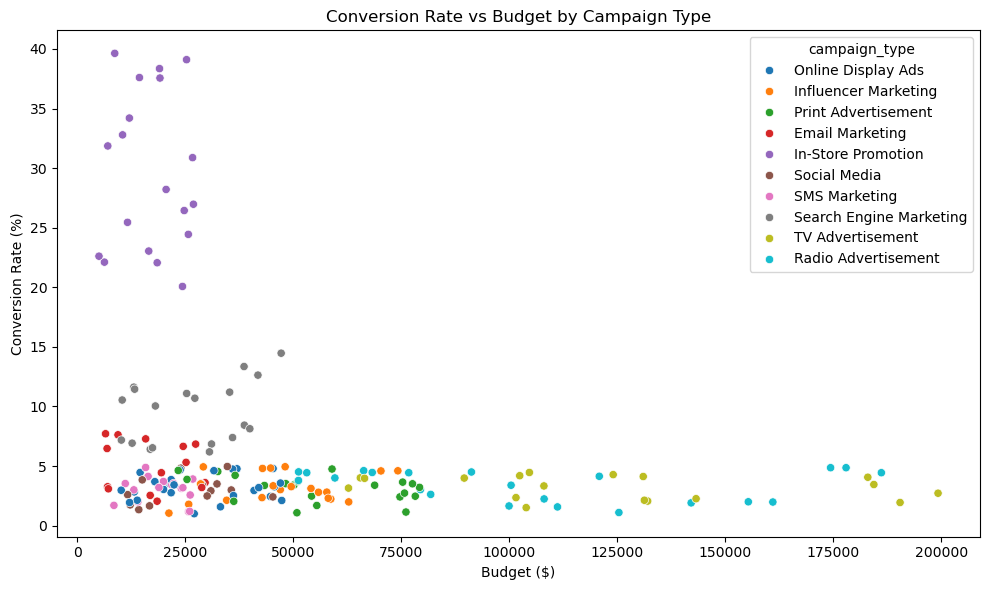

In [81]:
print("\n== Marketing Campaign Performance ==")
if "campaigns" in data:
    campaigns = data["campaigns"]
    display(campaigns.head())
    
       
    # Conversion rate vs budget
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="budget", y="conversion_rate", hue="campaign_type", data=campaigns)
    plt.title("Conversion Rate vs Budget by Campaign Type")
    plt.xlabel("Budget ($)")
    plt.ylabel("Conversion Rate (%)")
    plt.tight_layout()
    plt.show()


== Support Tickets Analysis ==


,ticket_id,customer_id,issue_category,priority,submission_date,resolution_date,resolution_status,resolution_time_hours,customer_satisfaction_score,notes
0,b38add31-c7bf-4dcd-ae90-6d7c3cca0728,20b8b390-06f6-4558-9641-9d87ca9de14c,Technical,NaN,2024-10-17 00:00:00,2024-10-18 11:00:00,Resolved,35.0,5.0,Customer experiencing software issues with Cof...
1,d391b9a7-80a2-4f12-bafc-678b0cdce568,53028554-1256-42c4-89ac-20eada75c706,Website Issue,High,2025-01-06 00:00:00,2025-01-07 13:00:00,Resolved,37.0,2.0,Customer account login issues on the website.
2,5efa523c-4793-4dc0-9a6a-142507fe1d45,763562c0-e28a-4859-ac64-c94e94d04bc8,Website Issue,Low,2022-01-28 00:00:00,2022-01-31 02:00:00,Resolved,74.0,3.0,Images not loading on Cookware Set page.
3,f599efaf-e9ab-46d9-b5e3-5df3e5d9084e,b3cebbcc-3232-4425-9af8-af2685b6bece,NaN,High,2021-04-16 00:00:00,2021-04-16 21:00:00,Resolved,21.0,4.0,iPad not powering on after purchase.
4,a25e2a1b-4000-4eae-ab96-fe7f9f227178,3382f162-464f-4ee1-a68e-8ad71fc48f8b,Product Inquiry,Low,2025-01-14 00:00:00,2025-01-16 21:00:00,Resolved,NaN,4.0,Customer inquiring about Coffee Maker compatib...


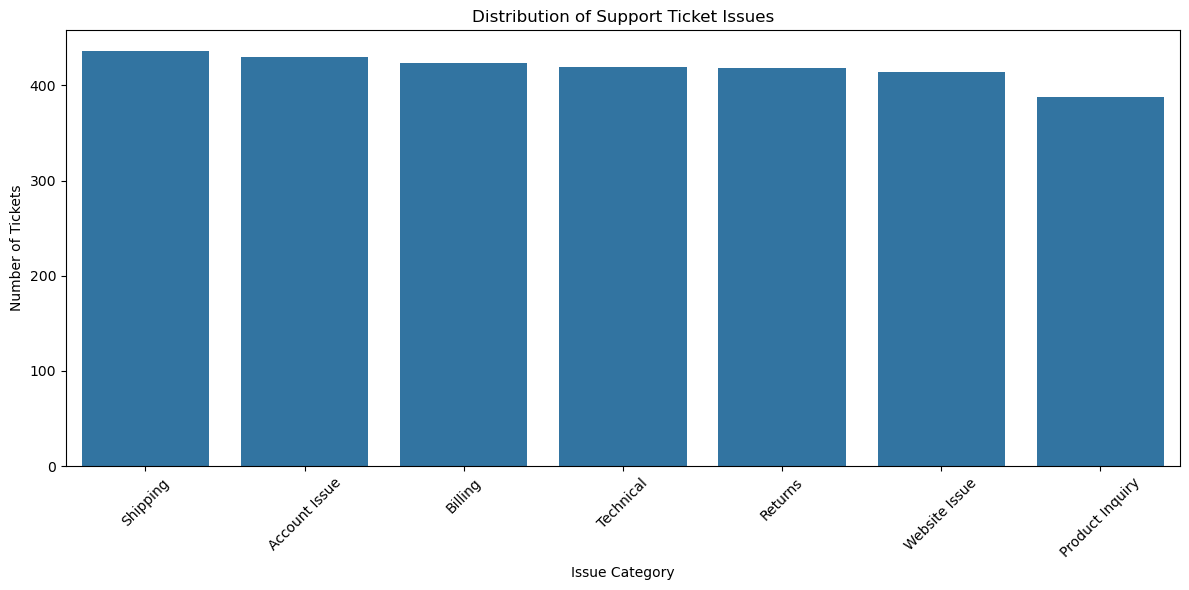

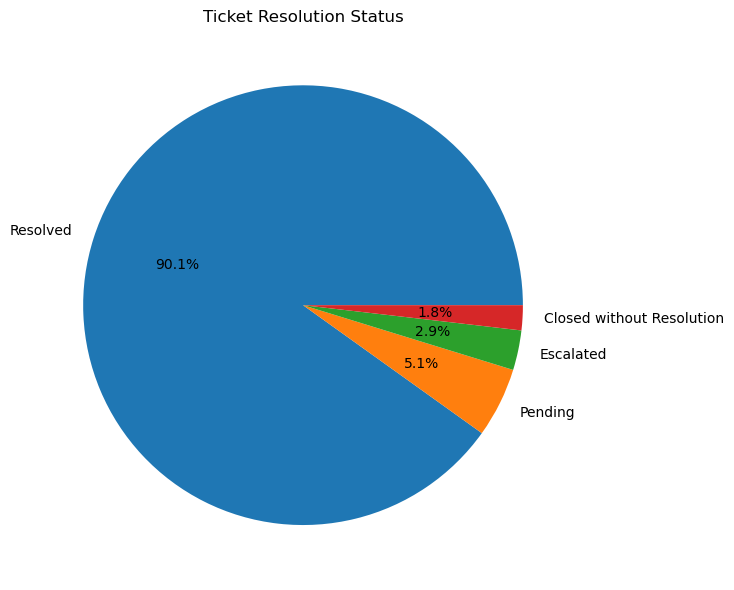

In [83]:
print("\n== Support Tickets Analysis ==")
if "support_tickets" in data:
    tickets = data["support_tickets"]
    display(tickets.head())
    
    # Issue category distribution
    plt.figure(figsize=(12, 6))
    issue_counts = tickets["issue_category"].value_counts()
    sns.barplot(x=issue_counts.index, y=issue_counts.values)
    plt.title("Distribution of Support Ticket Issues")
    plt.xlabel("Issue Category")
    plt.ylabel("Number of Tickets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Resolution status
    plt.figure(figsize=(10, 6))
    status_counts = tickets["resolution_status"].value_counts()
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
    plt.title("Ticket Resolution Status")
    plt.tight_layout()
    plt.show()


== Customer Interactions ==


,interaction_id,customer_id,channel,interaction_type,interaction_date,duration,page_or_product,session_id
0,423db3d3-659d-433f-859a-eea2ff1e2d2c,00012aa8-e99c-4e30-b3f6-1f7e36adc517,NaN,review,2023-03-11 08:37:00,128.0,home,00012aa8-e99c-4e30-b3f6-1f7e36adc517_session_0
1,8cf67dd6-63f8-4333-924d-2126aa87a91d,00012aa8-e99c-4e30-b3f6-1f7e36adc517,web,wishlist_add,2023-03-22 04:57:00,9.0,Dell XPS 15,00012aa8-e99c-4e30-b3f6-1f7e36adc517_session_1
2,2e8e17c8-c40f-46ea-810f-08c987eb07c7,00012aa8-e99c-4e30-b3f6-1f7e36adc517,web,review,2023-04-11 14:47:00,205.0,category_kitchen,00012aa8-e99c-4e30-b3f6-1f7e36adc517_session_2
3,d5d18036-735c-4d70-842a-0f82a4873fbf,00012aa8-e99c-4e30-b3f6-1f7e36adc517,web,page_view,2023-05-23 07:20:00,65.0,category_laptops,00012aa8-e99c-4e30-b3f6-1f7e36adc517_session_3
4,ef756343-1635-4510-85c8-41a399adb8f8,00012aa8-e99c-4e30-b3f6-1f7e36adc517,web,product_view,2023-06-06 02:57:00,146.0,Bose Headphones,00012aa8-e99c-4e30-b3f6-1f7e36adc517_session_4


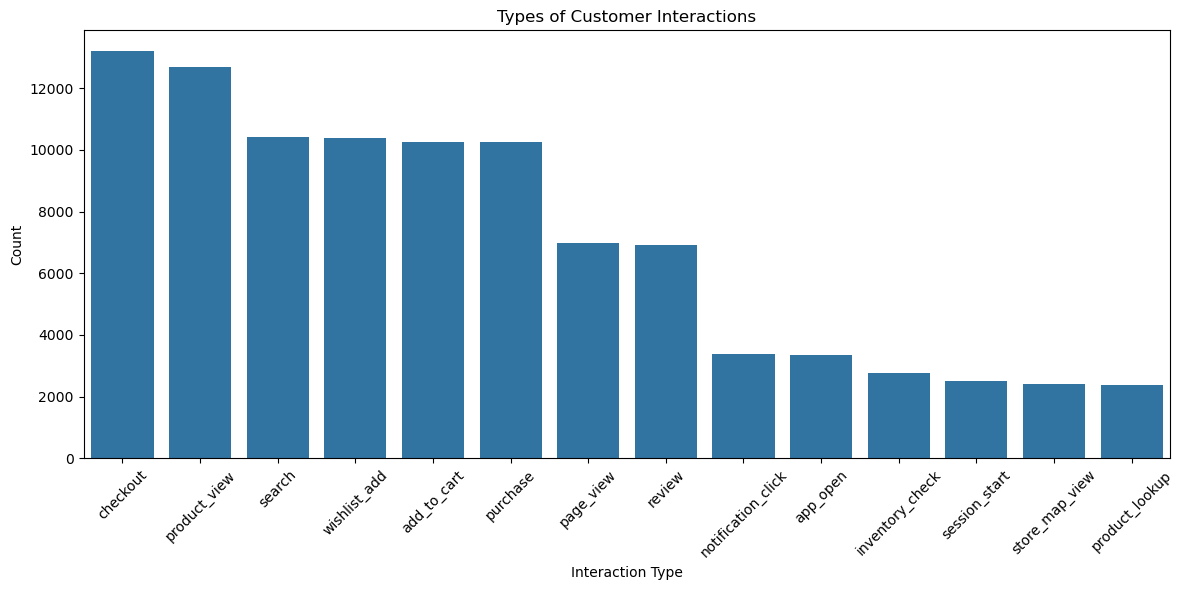

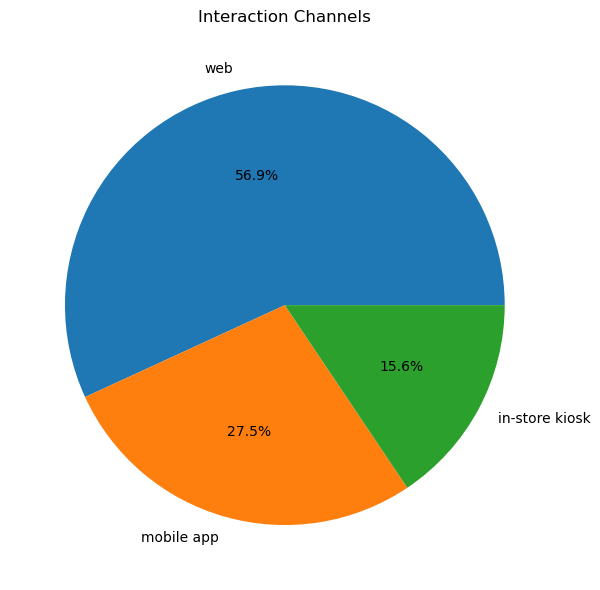

In [85]:
print("\n== Customer Interactions ==")
if "interactions" in data:
    interactions = data["interactions"]
    display(interactions.head())
    
    # Interaction type distribution
    plt.figure(figsize=(12, 6))
    interaction_counts = interactions["interaction_type"].value_counts()
    sns.barplot(x=interaction_counts.index, y=interaction_counts.values)
    plt.title("Types of Customer Interactions")
    plt.xlabel("Interaction Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Channel distribution
    plt.figure(figsize=(10, 6))
    channel_counts = interactions["channel"].value_counts()
    plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
    plt.title("Interaction Channels")
    plt.tight_layout()
    plt.show()

In [87]:
if "customers" in data:
    print(f"• Total Customers: {len(data['customers'])}")

# Total sales
if "transactions" in data:
    total_sales = data["transactions"]["price"].sum()
    print(f"• Total Sales: ${total_sales:,.2f}")
    
    # Average order value
    avg_order = total_sales / len(data["transactions"])
    print(f"• Average Order Value: ${avg_order:.2f}")

# Average review rating
if "customer_reviews_complete" in data:
    avg_rating = data["customer_reviews_complete"]["rating"].mean()
    print(f"• Average Product Rating: {avg_rating:.1f}/5")

# Campaign performance
if "campaigns" in data:
    avg_roi = data["campaigns"]["roi"].mean()
    print(f"• Average Campaign ROI: {avg_roi:.2f}%")
    
    # Total marketing spend
    total_spend = data["campaigns"]["budget"].sum()
    print(f"• Total Marketing Spend: ${total_spend:,.2f}")

# Support tickets
if "support_tickets" in data:
    open_tickets = data["support_tickets"][data["support_tickets"]["resolution_status"] == "Open"].shape[0]
    print(f"• Open Support Tickets: {open_tickets}")
    
    avg_resolution = data["support_tickets"]["resolution_time_hours"].mean()
    print(f"• Average Resolution Time: {avg_resolution:.1f} hours")

print("\nData exploration complete! ✅")

• Total Customers: 5000
• Total Sales: $19,715,543.55
• Average Order Value: $610.48
• Average Product Rating: 4.0/5
• Average Campaign ROI: 1506.88%
• Total Marketing Spend: $9,455,274.40
• Open Support Tickets: 0
• Average Resolution Time: 46.0 hours

Data exploration complete! ✅


In [123]:
def connect_to_neo4j():
    """Create a connection to the Neo4j database"""
    print("Attempting to connect to Neo4j...")
    print(f"URI: {NEO4J_URI}")
    print(f"Username: {NEO4J_USERNAME}")
    
    try:
        driver = GraphDatabase.driver(
            NEO4J_URI, 
            auth=(NEO4J_USERNAME, NEO4J_PASSWORD)
        )
        
        # Test connection
        with driver.session() as session:
            result = session.run("RETURN 'Connected to Neo4j!' AS message")
            message = result.single()["message"]
            print(f"✅ {message}")
            
        return driver
    except Exception as e:
        print(f"❌ Failed to connect to Neo4j: {str(e)}")
        print("Please check your Neo4j server is running and credentials are correct.")
        return None
connect_to_neo4j()

Attempting to connect to Neo4j...
URI: neo4j+s://99a87445.databases.neo4j.io
Username: neo4j
✅ Connected to Neo4j!


In [130]:
driver=connect_to_neo4j()
def reset_database(driver):
    """Clear all data from the Neo4j database"""
    if not driver:
        print("No connection to Neo4j")
        return
    
    with driver.session() as session:
        # Delete all data
        session.run("MATCH (n) DETACH DELETE n")
        print("Database reset complete ✓")
reset_database(driver)

Attempting to connect to Neo4j...
URI: neo4j+s://99a87445.databases.neo4j.io
Username: neo4j
✅ Connected to Neo4j!
Database reset complete ✓


In [132]:
def create_schema(driver):
    """Create constraints and indexes for better performance"""
    if not driver:
        print("No connection to Neo4j")
        return
    
    with driver.session() as session:
        # Create constraints for unique IDs
        constraints = [
            "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Customer) REQUIRE c.customer_id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Transaction) REQUIRE t.transaction_id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (p:Product) REQUIRE p.name IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (r:Review) REQUIRE r.review_id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Interaction) REQUIRE i.interaction_id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Campaign) REQUIRE c.campaign_id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Ticket) REQUIRE t.ticket_id IS UNIQUE"
        ]
        
        # Create indexes for faster queries
        indexes = [
            "CREATE INDEX IF NOT EXISTS FOR (p:Product) ON (p.category)",
            "CREATE INDEX IF NOT EXISTS FOR (c:Customer) ON (c.age)",
            "CREATE INDEX IF NOT EXISTS FOR (r:Review) ON (r.rating)"
        ]
        
        # Execute all constraints
        for constraint in constraints:
            try:
                session.run(constraint)
                print(f"Created constraint: {constraint.split('FOR')[1].split('REQUIRE')[0].strip()}")
            except Exception as e:
                print(f"Error creating constraint: {str(e)}")
        
        # Execute all indexes
        for index in indexes:
            try:
                session.run(index)
                print(f"Created index: {index.split('FOR')[1].split('ON')[0].strip()}")
            except Exception as e:
                print(f"Error creating index: {str(e)}")
                
        print("Schema creation complete ✓")
create_schema(driver)

Created constraint: (c:Customer)
Created constraint: (t:Transaction)
Created constraint: (p:Product)
Created constraint: (r:Review)
Created constraint: (i:Interaction)
Created constraint: (c:Campaign)
Created constraint: (t:Ticket)
Created index: (p:Product)
Created index: (c:Customer)
Created index: (r:Review)
Schema creation complete ✓


In [ ]:
def load_customers(driver, customers_df):
    """Load customer data into Neo4j"""
    if not driver:
        print("No connection to Neo4j")
        return
    
    print(f"Loading {len(customers_df)} customers...")
    start_time = time.time()
    
    with driver.session() as session:
        # Convert DataFrame to list of dictionaries
        customers = customers_df.to_dict('records')
        
        # Load data in batches to avoid memory issues
        batch_size = 1000
        for i in range(0, len(customers), batch_size):
            batch = customers[i:i+batch_size]
            session.run("""
                UNWIND $batch AS customer
                CREATE (c:Customer {customer_id: customer.customer_id})
                SET c += customer
            """, {"batch": batch})

In [134]:
DATA_PATH = "C:\\demos\\GraphRAG\\data"

In [136]:
customers_df = pd.read_csv(os.path.join(DATA_PATH, "customers.csv"))

In [138]:
print(f"Loaded {len(customers_df)} customers from CSV")

Loaded 5000 customers from CSV


In [142]:
with driver.session() as session:
    customers = customers_df.to_dict('records')
    session.run("""
        UNWIND $customers AS customer
        CREATE (c:Customer {customer_id: customer.customer_id})
        SET c += customer
    """, {"customers": customers})
print("Customers imported to Neo4j")

Customers imported to Neo4j


In [148]:
transactions_df = pd.read_csv(os.path.join(DATA_PATH, "transactions.csv"))
print(f"Loaded {len(transactions_df)} transactions from CSV")

# Only fix the specific issue - NaN in product_name
transactions_df['product_name'] = transactions_df['product_name'].fillna('Unknown Product')
transactions_df['product_category'] = transactions_df['product_category'].fillna('Uncategorized')

with driver.session() as session:
    transactions = transactions_df.to_dict('records')
    session.run("""
        UNWIND $transactions AS tx
        MATCH (c:Customer {customer_id: tx.customer_id})
        CREATE (t:Transaction {transaction_id: tx.transaction_id})
        SET t += tx
        MERGE (p:Product {name: tx.product_name})
        ON CREATE SET p.category = tx.product_category
        CREATE (c)-[:PURCHASED]->(t)
        CREATE (t)-[:CONTAINS]->(p)
    """, {"transactions": transactions})
print("Transactions and Products imported to Neo4j")

Loaded 32295 transactions from CSV
Transactions and Products imported to Neo4j


In [150]:
reviews_df = pd.read_csv(os.path.join(DATA_PATH, "customer_reviews_complete.csv"))
print(f"Loaded {len(reviews_df)} reviews from CSV")

# Only fix product_name which is used in MERGE
reviews_df['product_name'] = reviews_df['product_name'].fillna('Unknown Product')

with driver.session() as session:
    reviews = reviews_df.to_dict('records')
    session.run("""
        UNWIND $reviews AS review
        MATCH (c:Customer {customer_id: review.customer_id})
        MERGE (p:Product {name: review.product_name})
        ON CREATE SET p.category = review.product_category
        CREATE (r:Review {review_id: review.review_id})
        SET r += review
        CREATE (c)-[:WROTE]->(r)
        CREATE (r)-[:ABOUT]->(p)
    """, {"reviews": reviews})
print("Reviews imported to Neo4j")

Loaded 1000 reviews from CSV
Reviews imported to Neo4j


In [152]:
campaigns_df = pd.read_csv(os.path.join(DATA_PATH, "campaigns.csv"))
print(f"Loaded {len(campaigns_df)} campaigns from CSV")

with driver.session() as session:
    campaigns = campaigns_df.to_dict('records')
    session.run("""
        UNWIND $campaigns AS campaign
        CREATE (c:Campaign {campaign_id: campaign.campaign_id})
        SET c += campaign
    """, {"campaigns": campaigns})
print("Campaigns imported to Neo4j")

Loaded 200 campaigns from CSV
Campaigns imported to Neo4j


In [154]:
tickets_df = pd.read_csv(os.path.join(DATA_PATH, "support_tickets.csv"))
print(f"Loaded {len(tickets_df)} support tickets from CSV")

with driver.session() as session:
    tickets = tickets_df.to_dict('records')
    session.run("""
        UNWIND $tickets AS ticket
        MATCH (c:Customer {customer_id: ticket.customer_id})
        CREATE (t:Ticket {ticket_id: ticket.ticket_id})
        SET t += ticket
        CREATE (c)-[:SUBMITTED]->(t)
    """, {"tickets": tickets})
print("Support tickets imported to Neo4j")

Loaded 3000 support tickets from CSV
Support tickets imported to Neo4j


In [162]:
interactions_df = pd.read_csv(os.path.join(DATA_PATH, "interactions.csv"))
print(f"Loaded {len(interactions_df)} interactions from CSV")

# Process in simple batches
batch_size = 200  # Smaller batches to avoid memory issues
total = len(interactions_df)
processed = 0

print(f"Importing interactions in batches of {batch_size}...")
for i in range(0, total, batch_size):
    end = min(i + batch_size, total)
    batch = interactions_df.iloc[i:end]
    
    with driver.session() as session:
        interactions = batch.to_dict('records')
        session.run("""
            UNWIND $interactions AS interaction
            MATCH (c:Customer {customer_id: interaction.customer_id})
            CREATE (i:Interaction {interaction_id: interaction.interaction_id})
            SET i += interaction
            CREATE (c)-[:HAD]->(i)
        """, {"interactions": interactions})
    
    processed += len(batch)
    print(f"Imported {processed}/{total} interactions")

print("All interactions imported to Neo4j")

Loaded 100000 interactions from CSV
Importing interactions in batches of 200...
Imported 200/100000 interactions
Imported 400/100000 interactions
Imported 600/100000 interactions
Imported 800/100000 interactions
Imported 1000/100000 interactions
Imported 1200/100000 interactions
Imported 1400/100000 interactions
Imported 1600/100000 interactions
Imported 1800/100000 interactions
Imported 2000/100000 interactions
Imported 2200/100000 interactions
Imported 2400/100000 interactions
Imported 2600/100000 interactions
Imported 2800/100000 interactions
Imported 3000/100000 interactions
Imported 3200/100000 interactions
Imported 3400/100000 interactions
Imported 3600/100000 interactions
Imported 3800/100000 interactions
Imported 4000/100000 interactions
Imported 4200/100000 interactions
Imported 4400/100000 interactions
Imported 4600/100000 interactions
Imported 4800/100000 interactions
Imported 5000/100000 interactions
Imported 5200/100000 interactions
Imported 5400/100000 interactions
Import

In [164]:
!pip install sentence-transformers langchain-community

In [166]:
from sentence_transformers import SentenceTransformer
from neo4j import GraphDatabase
import numpy as np
import os

In [168]:
print("Loading the embedding model...")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded successfully!")

Loading the embedding model...
Model loaded successfully!


In [178]:
driver = GraphDatabase.driver(
    NEO4J_URI, 
    auth=(NEO4J_USERNAME, NEO4J_PASSWORD)
)

In [180]:
print("Creating vector indexes...")

# Use a fresh session for each operation
with driver.session() as session:
    # Create vector index for reviews
    session.run("""
    CREATE VECTOR INDEX review_vector IF NOT EXISTS
    FOR (r:Review)
    ON (r.embedding)
    OPTIONS {indexConfig: {
        `vector.dimensions`: 384,
        `vector.similarity_function`: 'cosine'
    }}
    """)
    print("Created review vector index")

Creating vector indexes...
Created review vector index


In [182]:
with driver.session() as session:
    # Create vector index for support tickets
    session.run("""
    CREATE VECTOR INDEX ticket_vector IF NOT EXISTS
    FOR (t:Ticket)
    ON (t.embedding)
    OPTIONS {indexConfig: {
        `vector.dimensions`: 384,
        `vector.similarity_function`: 'cosine'
    }}
    """)
    print("Created ticket vector index")

print("Vector indexes created successfully")

Created ticket vector index
Vector indexes created successfully


In [186]:
reviews = []
with driver.session() as session:
    result = session.run("""
        MATCH (r:Review)
        RETURN r.review_id AS id,
               COALESCE(r.review_title, '') + ' ' + COALESCE(r.review_text, '') AS text
        LIMIT 1000  // Limit for demo purposes
    """)
    
    for record in result:
        reviews.append((record["id"], record["text"]))

print(f"Retrieved {len(reviews)} reviews")


Retrieved 1000 reviews


In [188]:
batch_size = 50
processed = 0

print("Generating and storing embeddings...")
for i in range(0, len(reviews), batch_size):
    # Get a batch of reviews
    batch = reviews[i:min(i+batch_size, len(reviews))]
    review_ids = [r[0] for r in batch]
    texts = [r[1] for r in batch]
    
    # Generate embeddings
    embeddings = model.encode(texts)
    
    # Store embeddings in Neo4j
    with driver.session() as session:
        for j, embedding in enumerate(embeddings):
            session.run("""
                MATCH (r:Review {review_id: $id})
                SET r.embedding = $embedding
            """, {"id": review_ids[j], "embedding": embedding.tolist()})
    
    processed += len(batch)
    print(f"Processed {processed}/{len(reviews)} reviews")

# Verify embeddings were stored
with driver.session() as session:
    result = session.run("""
        MATCH (r:Review)
        WHERE r.embedding IS NOT NULL
        RETURN count(r) as reviewsWithEmbeddings
    """)
    count = result.single()["reviewsWithEmbeddings"]
    print(f"\nVerification: {count} reviews now have embeddings")

Generating and storing embeddings...
Processed 50/1000 reviews
Processed 100/1000 reviews
Processed 150/1000 reviews
Processed 200/1000 reviews
Processed 250/1000 reviews
Processed 300/1000 reviews
Processed 350/1000 reviews
Processed 400/1000 reviews
Processed 450/1000 reviews
Processed 500/1000 reviews
Processed 550/1000 reviews
Processed 600/1000 reviews
Processed 650/1000 reviews
Processed 700/1000 reviews
Processed 750/1000 reviews
Processed 800/1000 reviews
Processed 850/1000 reviews
Processed 900/1000 reviews
Processed 950/1000 reviews
Processed 1000/1000 reviews

Verification: 1000 reviews now have embeddings


In [196]:
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Models loaded")

Models loaded


In [198]:
schema_info = """
Node labels:
- Customer (customer_id, full_name, age, gender, email, phone, etc.)
- Transaction (transaction_id, customer_id, product_name, price, transaction_date, etc.)
- Product (name, category)
- Review (review_id, customer_id, product_name, rating, review_title, review_text, etc.)
- Interaction (interaction_id, customer_id, channel, interaction_type, interaction_date, etc.)
- Campaign (campaign_id, campaign_name, campaign_type, target_segment, budget, impressions, roi, etc.)
- Ticket (ticket_id, customer_id, issue_category, priority, submission_date, resolution_status, etc.)

Relationships:
- PURCHASED: Customer -> Transaction
- CONTAINS: Transaction -> Product
- WROTE: Customer -> Review
- ABOUT: Review -> Product
- HAD: Customer -> Interaction
- SUBMITTED: Customer -> Ticket
"""

In [260]:
os.environ["LANGCHAIN_TRACING_V2"] = "false"


In [232]:
ORGANIZATION_ID = "a1d861e8-303b-48fd-a953-8d71e6ca25d0"

In [234]:
print("=== Configuration ===")
print(f"Organization ID: {ORGANIZATION_ID}")
print(f"LangSmith Project: {os.environ.get('LANGCHAIN_PROJECT')}")
print(f"LangSmith Tracing: {os.environ.get('LANGCHAIN_TRACING_V2')}")
print(f"API Key Setup: {'Yes' if os.environ.get('LANGCHAIN_API_KEY') else 'No'}")
print("====================\n")

=== Configuration ===
Organization ID: a1d861e8-303b-48fd-a953-8d71e6ca25d0
LangSmith Project: GraphRAG-Demo
LangSmith Tracing: true
API Key Setup: Yes



In [238]:
from langchain.callbacks.tracers import LangChainTracer
from langchain_core.tracers import ConsoleCallbackHandler
tracer = LangChainTracer(
    project_name=os.environ.get("LANGCHAIN_PROJECT", "default")
)

# Add a console callback handler to see traces locally
console_handler = ConsoleCallbackHandler()

In [262]:
llm = ChatDeepSeek(
    model="deepseek-chat",
    api_key=DEEPSEEK_API_KEY,
    temperature=0.1,
    callbacks=[]  # Explicitly add tracers
)

In [210]:
def nl_to_cypher(question):
    # Create prompt for the LLM
    prompt = f"""
You are an expert in Neo4j and Cypher query language. 
Convert the following question into a Cypher query that can run on Neo4j.

Here is the graph schema:
{schema_info}

User Question: {question}

Write a Cypher query that answers this question. Return ONLY the Cypher query without any explanations or markdown formatting.
"""
    
    # Generate Cypher query - extract the content as a string from the AIMessage
    response = llm.invoke(prompt)
    # Make sure we're getting just the string content from the response
    if hasattr(response, 'content'):
        cypher_query = response.content
    else:
        cypher_query = str(response)
    
    return cypher_query

In [212]:
def execute_cypher(cypher_query):
    with driver.session() as session:
        try:
            # Ensure we're passing a string
            if not isinstance(cypher_query, str):
                cypher_query = str(cypher_query)
                
            result = session.run(cypher_query)
            records = [record.data() for record in result]
            return records
        except Exception as e:
            return {"error": str(e)}

In [214]:
def process_query(question):
    print(f"\nProcessing question: {question}")
    
    # Convert to Cypher
    cypher_query = nl_to_cypher(question)
    print(f"\nGenerated Cypher query:\n{cypher_query}")
    
    # Execute query
    results = execute_cypher(cypher_query)
    
    # Display results
    if isinstance(results, dict) and "error" in results:
        print(f"\nError executing query: {results['error']}")
    else:
        print(f"\nQuery results ({len(results)} records):")
        for i, record in enumerate(results[:5]):  # Show first 5 results
            print(f"\nResult {i+1}:")
            for key, value in record.items():
                print(f"  {key}: {value}")
        
        if len(results) > 5:
            print(f"\n... and {len(results) - 5} more records")
    
    return {
        "question": question,
        "cypher_query": cypher_query,
        "results": results
    }

In [276]:
warnings.filterwarnings("ignore")

In [280]:
import logging
logging.getLogger('langsmith').setLevel(logging.ERROR)
logging.getLogger('langchain').setLevel(logging.ERROR)

In [272]:
from IPython.display import display, HTML
def display_results_html(question, cypher_query, results):
    # Start with the question
    html = f"<h3>Question:</h3><p>{question}</p>"
    
    # Add the generated Cypher query
    html += f"<h3>Generated Cypher Query:</h3><pre>{cypher_query}</pre>"
    
    # Display results or error
    if isinstance(results, dict) and "error" in results:
        html += f"<h3>Error:</h3><p style='color: red;'>{results['error']}</p>"
    else:
        html += f"<h3>Results ({len(results)} records):</h3>"
        # Convert to pandas DataFrame for easy display
        if results:
            df = pd.DataFrame(results)
            html += df.to_html(index=False)
        else:
            html += "<p>No results found</p>"
    
    display(HTML(html))
    return html


In [268]:
def process_query_html(question):
    print(f"Processing question: {question}")
    
    # Convert to Cypher
    cypher_query = nl_to_cypher(question)
    print(f"Generated Cypher query: {cypher_query}")
    
    # Execute query
    results = execute_cypher(cypher_query)
    
    # Display results as HTML
    html = display_results_html(question, cypher_query, results)
    
    return {
        "question": question,
        "cypher_query": cypher_query,
        "results": results
    }

In [282]:
process_query_html("What are the top 5 products based on sales volume?")

Processing question: What are the top 5 products based on sales volume?
Generated Cypher query: MATCH (t:Transaction)-[:CONTAINS]->(p:Product)
RETURN p.name AS product_name, COUNT(t) AS sales_volume
ORDER BY sales_volume DESC
LIMIT 5


product_name,sales_volume
iPhone 13,913
OnePlus 10,904
Xiaomi Mi 12,904
Amazon Echo,893
Google Nest,884


{'question': 'What are the top 5 products based on sales volume?',
 'cypher_query': 'MATCH (t:Transaction)-[:CONTAINS]->(p:Product)\nRETURN p.name AS product_name, COUNT(t) AS sales_volume\nORDER BY sales_volume DESC\nLIMIT 5',
 'results': [{'product_name': 'iPhone 13', 'sales_volume': 913},
  {'product_name': 'OnePlus 10', 'sales_volume': 904},
  {'product_name': 'Xiaomi Mi 12', 'sales_volume': 904},
  {'product_name': 'Amazon Echo', 'sales_volume': 893},
  {'product_name': 'Google Nest', 'sales_volume': 884}]}

In [284]:
process_query_html("Which customers have submitted the most support tickets?")

Processing question: Which customers have submitted the most support tickets?
Generated Cypher query: MATCH (c:Customer)-[:SUBMITTED]->(t:Ticket)
RETURN c.customer_id, c.full_name, COUNT(t) AS ticket_count
ORDER BY ticket_count DESC
LIMIT 10


c.customer_id,c.full_name,ticket_count
3edd92e7-bf44-48f3-88aa-c3911ed9a3b6,Samantha Jordan,6
48513906-63ed-4229-977b-26aeb0fec64b,Kathryn Valencia,5
eec1fe79-2c33-405b-8c58-6bb5a92aa189,Gina Zamora,5
93abf46f-6d3e-4335-a213-8377f923dfc6,Phillip Robertson,5
c9c455ae-9d6f-40d4-9866-c762d5b1bc3f,Heidi Hendricks,4
39244d87-9153-4987-919a-1d7ff3176eb2,Brian Braun,4
b41a63b7-a874-4be9-af1c-39899938e5f8,Matthew Carpenter,4
75ff6efb-f8e3-4722-aed6-6ce804b0c5b3,Mary Martin,4
881e9d1a-7cad-4dde-b071-f2431a23df26,Mary Garcia,4
1b1672d9-f157-4cf8-8c77-04c1f67cc565,Michael Lam,4


{'question': 'Which customers have submitted the most support tickets?',
 'cypher_query': 'MATCH (c:Customer)-[:SUBMITTED]->(t:Ticket)\nRETURN c.customer_id, c.full_name, COUNT(t) AS ticket_count\nORDER BY ticket_count DESC\nLIMIT 10',
 'results': [{'c.customer_id': '3edd92e7-bf44-48f3-88aa-c3911ed9a3b6',
   'c.full_name': 'Samantha Jordan',
   'ticket_count': 6},
  {'c.customer_id': '48513906-63ed-4229-977b-26aeb0fec64b',
   'c.full_name': 'Kathryn Valencia',
   'ticket_count': 5},
  {'c.customer_id': 'eec1fe79-2c33-405b-8c58-6bb5a92aa189',
   'c.full_name': 'Gina Zamora',
   'ticket_count': 5},
  {'c.customer_id': '93abf46f-6d3e-4335-a213-8377f923dfc6',
   'c.full_name': 'Phillip Robertson',
   'ticket_count': 5},
  {'c.customer_id': 'c9c455ae-9d6f-40d4-9866-c762d5b1bc3f',
   'c.full_name': 'Heidi Hendricks',
   'ticket_count': 4},
  {'c.customer_id': '39244d87-9153-4987-919a-1d7ff3176eb2',
   'c.full_name': 'Brian Braun',
   'ticket_count': 4},
  {'c.customer_id': 'b41a63b7-a874-4be

In [286]:
process_query_html("Segment customers by age group and show their average spending and product category preferences")

Processing question: Segment customers by age group and show their average spending and product category preferences
Generated Cypher query: MATCH (c:Customer)-[:PURCHASED]->(t:Transaction)-[:CONTAINS]->(p:Product)
WITH 
    CASE 
        WHEN c.age < 20 THEN 'Under 20'
        WHEN c.age >= 20 AND c.age < 30 THEN '20-29'
        WHEN c.age >= 30 AND c.age < 40 THEN '30-39'
        WHEN c.age >= 40 AND c.age < 50 THEN '40-49'
        WHEN c.age >= 50 AND c.age < 60 THEN '50-59'
        ELSE '60+'
    END AS age_group,
    t.price AS price,
    p.category AS category
RETURN 
    age_group, 
    AVG(price) AS avg_spending, 
    category, 
    COUNT(*) AS preference_count
ORDER BY age_group, preference_count DESC


age_group,avg_spending,category,preference_count
20-29,NaN,Smartphones,1169
20-29,NaN,Smart Home Devices,1095
20-29,NaN,Laptops,1078
20-29,NaN,Gaming Consoles,1056
20-29,NaN,Audio Equipment,860
20-29,NaN,Kitchen Appliances,272
20-29,NaN,Uncategorized,256
20-29,NaN,Computer Accessories,151
20-29,NaN,Cookware,141
20-29,NaN,Small Kitchen Appliances,139


{'question': 'Segment customers by age group and show their average spending and product category preferences',
 'cypher_query': "MATCH (c:Customer)-[:PURCHASED]->(t:Transaction)-[:CONTAINS]->(p:Product)\nWITH \n    CASE \n        WHEN c.age < 20 THEN 'Under 20'\n        WHEN c.age >= 20 AND c.age < 30 THEN '20-29'\n        WHEN c.age >= 30 AND c.age < 40 THEN '30-39'\n        WHEN c.age >= 40 AND c.age < 50 THEN '40-49'\n        WHEN c.age >= 50 AND c.age < 60 THEN '50-59'\n        ELSE '60+'\n    END AS age_group,\n    t.price AS price,\n    p.category AS category\nRETURN \n    age_group, \n    AVG(price) AS avg_spending, \n    category, \n    COUNT(*) AS preference_count\nORDER BY age_group, preference_count DESC",
 'results': [{'age_group': '20-29',
   'avg_spending': nan,
   'category': 'Smartphones',
   'preference_count': 1169},
  {'age_group': '20-29',
   'avg_spending': nan,
   'category': 'Smart Home Devices',
   'preference_count': 1095},
  {'age_group': '20-29',
   'avg_spe

In [290]:
process_query_html("Identify our highest value customers based on total purchase amount and frequency")

Processing question: Identify our highest value customers based on total purchase amount and frequency
Generated Cypher query: MATCH (c:Customer)-[:PURCHASED]->(t:Transaction)
WITH c, SUM(t.price) AS total_purchase_amount, COUNT(t) AS purchase_frequency
ORDER BY total_purchase_amount DESC, purchase_frequency DESC
RETURN c.customer_id, c.full_name, total_purchase_amount, purchase_frequency
LIMIT 10;


c.customer_id,c.full_name,total_purchase_amount,purchase_frequency
1580c83f-3afc-4195-b4ae-923acac7e5ef,Larry Pena,NaN,33
4accc613-fb41-4dbd-ae53-7c4e93c7a2cc,Kristine Vasquez,NaN,24
d2fdc2f5-e605-4263-ac0e-7b51f5712b0d,Joshua Perez,NaN,24
4b7c9b4f-abd7-41d1-818d-be1cda7314b3,Logan Strickland,NaN,23
4319837a-5744-40d0-9439-0f4d0cf8d027,Deanna Kane,NaN,23
d9a2c0ba-45e8-4910-9c80-b64f36450a6d,Michael Bass,NaN,23
a30a847f-fe0b-4ad0-90aa-1dfec2ff8cd0,Lori Wilson,NaN,23
6b7b7d5d-2217-4484-a48e-9102728071d5,Katelyn Watkins,NaN,22
89037bc9-389d-484e-b6b4-9f627833f2df,Sergio Jones,NaN,21
48405c0e-84f6-41d1-bde3-0ad2511dd911,Danielle Sullivan,NaN,21


{'question': 'Identify our highest value customers based on total purchase amount and frequency',
 'cypher_query': 'MATCH (c:Customer)-[:PURCHASED]->(t:Transaction)\nWITH c, SUM(t.price) AS total_purchase_amount, COUNT(t) AS purchase_frequency\nORDER BY total_purchase_amount DESC, purchase_frequency DESC\nRETURN c.customer_id, c.full_name, total_purchase_amount, purchase_frequency\nLIMIT 10;',
 'results': [{'c.customer_id': '1580c83f-3afc-4195-b4ae-923acac7e5ef',
   'c.full_name': 'Larry Pena',
   'total_purchase_amount': nan,
   'purchase_frequency': 33},
  {'c.customer_id': '4accc613-fb41-4dbd-ae53-7c4e93c7a2cc',
   'c.full_name': 'Kristine Vasquez',
   'total_purchase_amount': nan,
   'purchase_frequency': 24},
  {'c.customer_id': 'd2fdc2f5-e605-4263-ac0e-7b51f5712b0d',
   'c.full_name': 'Joshua Perez',
   'total_purchase_amount': nan,
   'purchase_frequency': 24},
  {'c.customer_id': '4b7c9b4f-abd7-41d1-818d-be1cda7314b3',
   'c.full_name': 'Logan Strickland',
   'total_purchase_am

In [310]:
process_query_html("Compare the sales performance of different product categories")

Processing question: Compare the sales performance of different product categories
Generated Cypher query: MATCH (p:Product)<-[:CONTAINS]-(t:Transaction)
RETURN p.category AS ProductCategory, SUM(t.price) AS TotalSales
ORDER BY TotalSales DESC


ProductCategory,TotalSales
Smart Home Devices,NaN
Gaming Consoles,NaN
Smartphones,NaN
Computer Accessories,NaN
Laptops,NaN
Kitchen Appliances,NaN
Audio Equipment,NaN
Furniture,NaN
Small Kitchen Appliances,NaN
Home Decor,NaN


{'question': 'Compare the sales performance of different product categories',
 'cypher_query': 'MATCH (p:Product)<-[:CONTAINS]-(t:Transaction)\nRETURN p.category AS ProductCategory, SUM(t.price) AS TotalSales\nORDER BY TotalSales DESC',
 'results': [{'ProductCategory': 'Smart Home Devices', 'TotalSales': nan},
  {'ProductCategory': 'Gaming Consoles', 'TotalSales': nan},
  {'ProductCategory': 'Smartphones', 'TotalSales': nan},
  {'ProductCategory': 'Computer Accessories', 'TotalSales': nan},
  {'ProductCategory': 'Laptops', 'TotalSales': nan},
  {'ProductCategory': 'Kitchen Appliances', 'TotalSales': nan},
  {'ProductCategory': 'Audio Equipment', 'TotalSales': nan},
  {'ProductCategory': 'Furniture', 'TotalSales': nan},
  {'ProductCategory': 'Small Kitchen Appliances', 'TotalSales': nan},
  {'ProductCategory': 'Home Decor', 'TotalSales': nan},
  {'ProductCategory': 'Uncategorized', 'TotalSales': nan},
  {'ProductCategory': 'TVs', 'TotalSales': nan},
  {'ProductCategory': 'Tablets', 'Tot